In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Gerando dados para as ações
np.random.seed(0)
n_samples= 100
symbols = ['AAPL','GOOGLE','MSFT','AMZN','TSLA','FB']
prices = np.random.uniform(50,4000,n_samples)
volume = np.random.randint(100000,500000,n_samples)
market_cap = np.random.uniform(1e10,2e12,n_samples)

In [3]:
data = pd.DataFrame({
    'Símbolo':np.random.choice(symbols,n_samples),
    'Preço':prices,
    'Volume':volume,
    'Capitalização de mercado':market_cap
})

In [4]:
data.head()

,Símbolo,Preço,Volume,Capitalização de mercado
0,FB,2217.813341,452893,8.459500e+11
1,GOOGLE,2874.997997,264610,1.106703e+11
2,AAPL,2430.915335,108286,7.373373e+11
3,FB,2202.288573,471938,4.308967e+10
4,AAPL,1723.436457,204299,4.691772e+11


In [5]:
# Realizando o agrupamento com Kmeans
data_n = pd.get_dummies(data,columns=['Símbolo'],drop_first= True)

In [6]:
data_n.head()

,Preço,Volume,Capitalização de mercado,Símbolo_AMZN,Símbolo_FB,Símbolo_GOOGLE,Símbolo_MSFT,Símbolo_TSLA
0,2217.813341,452893,8.459500e+11,False,True,False,False,False
1,2874.997997,264610,1.106703e+11,False,False,True,False,False
2,2430.915335,108286,7.373373e+11,False,False,False,False,False
3,2202.288573,471938,4.308967e+10,False,True,False,False,False
4,1723.436457,204299,4.691772e+11,False,False,False,False,False


In [8]:
features = data_n[['Preço','Volume','Capitalização de mercado']]

In [9]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(features)
data_n['Cluster'] = kmeans.labels_

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


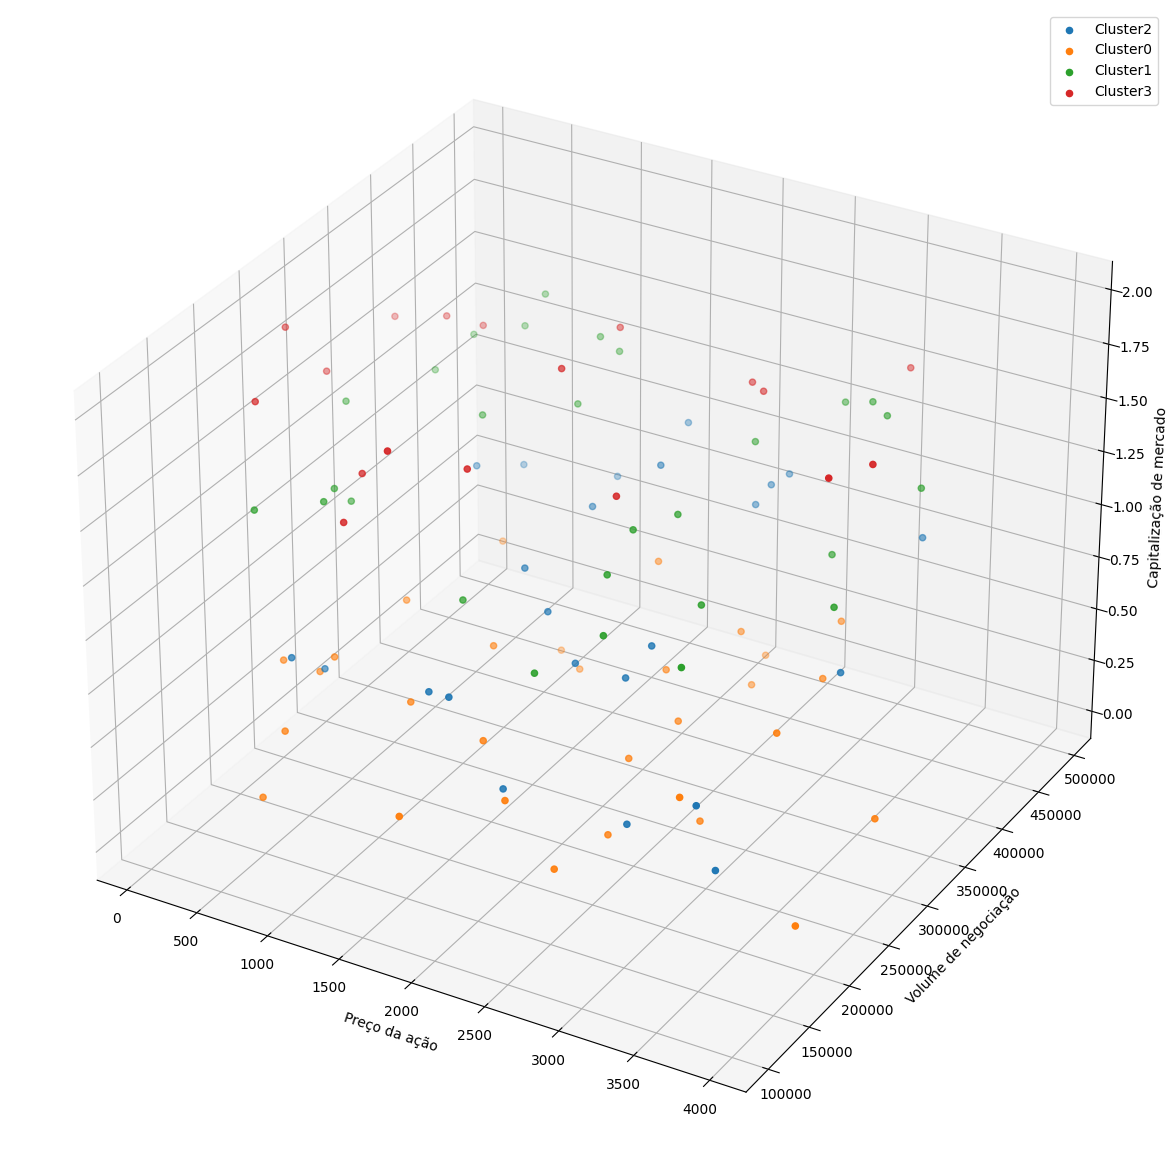

               Preço         Volume  Capitalização de mercado  Símbolo_AMZN  \
Cluster                                                                       
0        1884.892177  291017.033333              3.244851e+11      0.133333   
1        1908.799359  307945.035714              1.405114e+12      0.178571   
2        2117.821374  286968.958333              8.969757e+11      0.208333   
3        1718.483682  271179.166667              1.815346e+12      0.111111   

         Símbolo_FB  Símbolo_GOOGLE  Símbolo_MSFT  Símbolo_TSLA  
Cluster                                                          
0          0.100000        0.300000      0.166667      0.166667  
1          0.071429        0.035714      0.071429      0.285714  
2          0.208333        0.291667      0.041667      0.125000  
3          0.055556        0.277778      0.166667      0.222222  


In [ ]:
# Visualizando os grupos no grafico 3d
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
for cluster in data_n['Cluster'].unique():
    cluster_data=data_n[data_n['Cluster']==cluster]
    ax.scatter(cluster_data['Preço'],cluster_data['Volume'],
               cluster_data['Capitalização de mercado'],
               label=f'Cluster{cluster}')
ax.set_xlabel('Preço da ação')
ax.set_ylabel('Volume de negociação')
ax.set_zlabel('Capitalização de mercado')
plt.legend()
plt.show()

# Analisando os clusters
cluster_means = data_n.groupby('Cluster').mean()
print(cluster_means)

<Axes: xlabel='Símbolo', ylabel='Preço'>

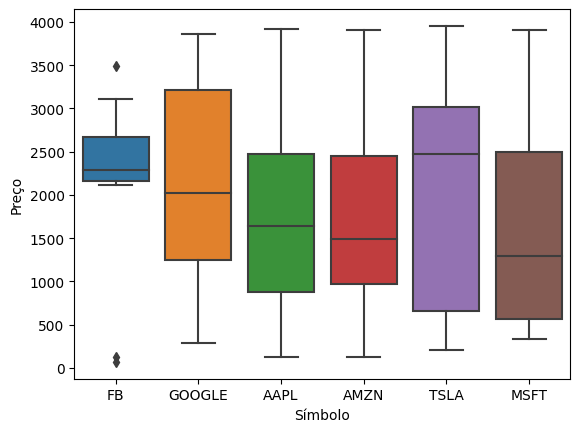

In [11]:
sns.boxplot(x=data['Símbolo'],y=data['Preço'])